# 先放入套件

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 讀入Fashion MNSIT 數據集

In [28]:
from tensorflow.keras.datasets import fashion_mnist

In [29]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 查看數據集

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [31]:
len(x_train)

60000

In [32]:
len(x_test)

10000

This is a red Dress


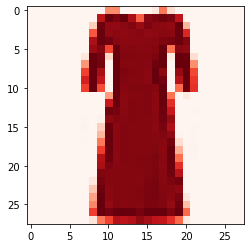

In [36]:
n = 9453
print('This is a red', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Reds')

# 利用隨機變數查看數據集

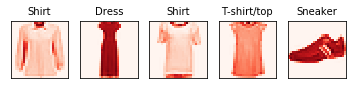

In [35]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Reds')

# 資料整理

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [11]:
model = tf.keras.Sequential()

In [12]:
model.add(tf.keras.layers.Dense(256,input_dim = 784,activation = tf.keras.layers.LeakyReLU(alpha=0.3) ))

In [13]:
model.add(tf.keras.layers.BatchNormalization())

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
Total params: 201,984
Trainable params: 201,472
Non-trainable params: 512
_________________________________________________________________


In [15]:
model.add(tf.keras.layers.Dense(128,activation = tf.keras.layers.LeakyReLU(alpha=0.3) ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate = 0.4))
model.add(tf.keras.layers.Dense(64,activation = tf.keras.layers.LeakyReLU(alpha=0.2) ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate = 0.3))
model.add(tf.keras.layers.Dense(32,activation = tf.keras.layers.LeakyReLU(alpha=0.1) ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate = 0.2))

model.add(tf.keras.layers.Dense(10,activation = "softmax" ))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                2

In [17]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                2

In [20]:
model.fit(x_train, y_train, batch_size = 1000, epochs = 10, shuffle = True)

ValueError: You are passing a target array of shape (60000, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

## 1.嘗試在深度學習的程式中放入隨機變數
## 2.改變呈現圖片的顏色
## 3.在最後打造神經網路的時候會出現error，不知道原因ＱＷＱ 課堂練習用jupyter notebook也會這樣